# State Average SAT Scores - An Observational Study

When, in 1982, average Scholastic Achievement Test (SAT) scores were first published on a state-by-state basis in the United States, the huge variation in the scores was a source of great pride for some states and of consternation for others.  Average scores ranged from a low of 790 (out of a possible 1,600) in South Carolina to a high of 1,088 in Iowa.  This 298-point spread dwarfed the 20-year national decline of 80 points.  Two researchers set out to "assess the extent to which the compositional/demographic and school-structural characteristics are implicated in SAT differences."  (Data from B. Powell and L. C. Steelman, "Variations in State SAT Performance:  Meaningful or Misleading?"  *Harvard Educational Review* 54(4) (1984): 389-412.)



The state averages of the local SAT (verbal + quantitative) scores are listed below, along with six variables that may be associated with the SAT differences among states.  Some explanatory variables come from the Powell and Steelman article, while others were obtained from the College Entrance Examination Board (by Robert Powers).  The variables are the following:  *Takers* is the percentage of the total eligible students (high school seniors) in the state who took the exam; *income* is the median income of families of test-takers, in hundreds of dollars; *years* is the average number of years that the test-takers, in hundreds of dollars; *years* is the number of years that the test-takers had formal studies in social sciences, natural sciences, and humanities; *public* is the percentage of the test-takers who attended public secondary schools; *expend* is the total state expenditure on secondary schools, expressed in hundreds of dollars per student; and *rank* is the median percentile ranking of the test-takers within their secondary school classes.

In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

sns.set()
pd.options.display.float_format = "{:.3f}".format
pd.options.display.max_columns = 12

We begin by reading the data and summarizing the variables.

In [2]:
path = pathlib.Path.home() / 'data' / 'sleuth3' / 'case1201.csv'
df = pd.read_csv(path)
df.head()

,State,SAT,Takers,Income,Years,Public,Expend,Rank
0,Iowa,1088,3,326,16.790,87.800,25.600,89.700
1,SouthDakota,1075,2,264,16.070,86.200,19.950,90.600
2,NorthDakota,1068,3,317,16.570,88.300,20.620,89.800
3,Kansas,1045,5,338,16.300,83.900,27.140,86.300
4,Nebraska,1045,5,293,17.250,83.600,21.050,88.500


In [3]:
summary = df.describe()
summary

,SAT,Takers,Income,Years,Public,Expend,Rank
count,50.000,50.000,50.000,50.000,50.000,50.000,50.000
mean,947.940,26.220,293.980,16.209,81.204,22.966,79.988
std,70.856,22.023,43.693,0.700,9.831,6.145,6.523
min,790.000,2.000,208.000,14.390,44.800,13.840,69.800
25%,889.250,6.250,261.500,15.910,76.925,19.593,74.025
50%,966.000,16.000,295.000,16.360,80.800,21.610,80.850
75%,998.500,47.750,325.000,16.758,88.250,26.388,85.825
max,1088.000,69.000,401.000,17.410,97.000,50.100,90.600


# Ranking After Accounting For Relative Student Quality

# Ranking After Accounting For State Expenditure

# Matrix of Scatterplots For SAT Scores And Explanatory Variables

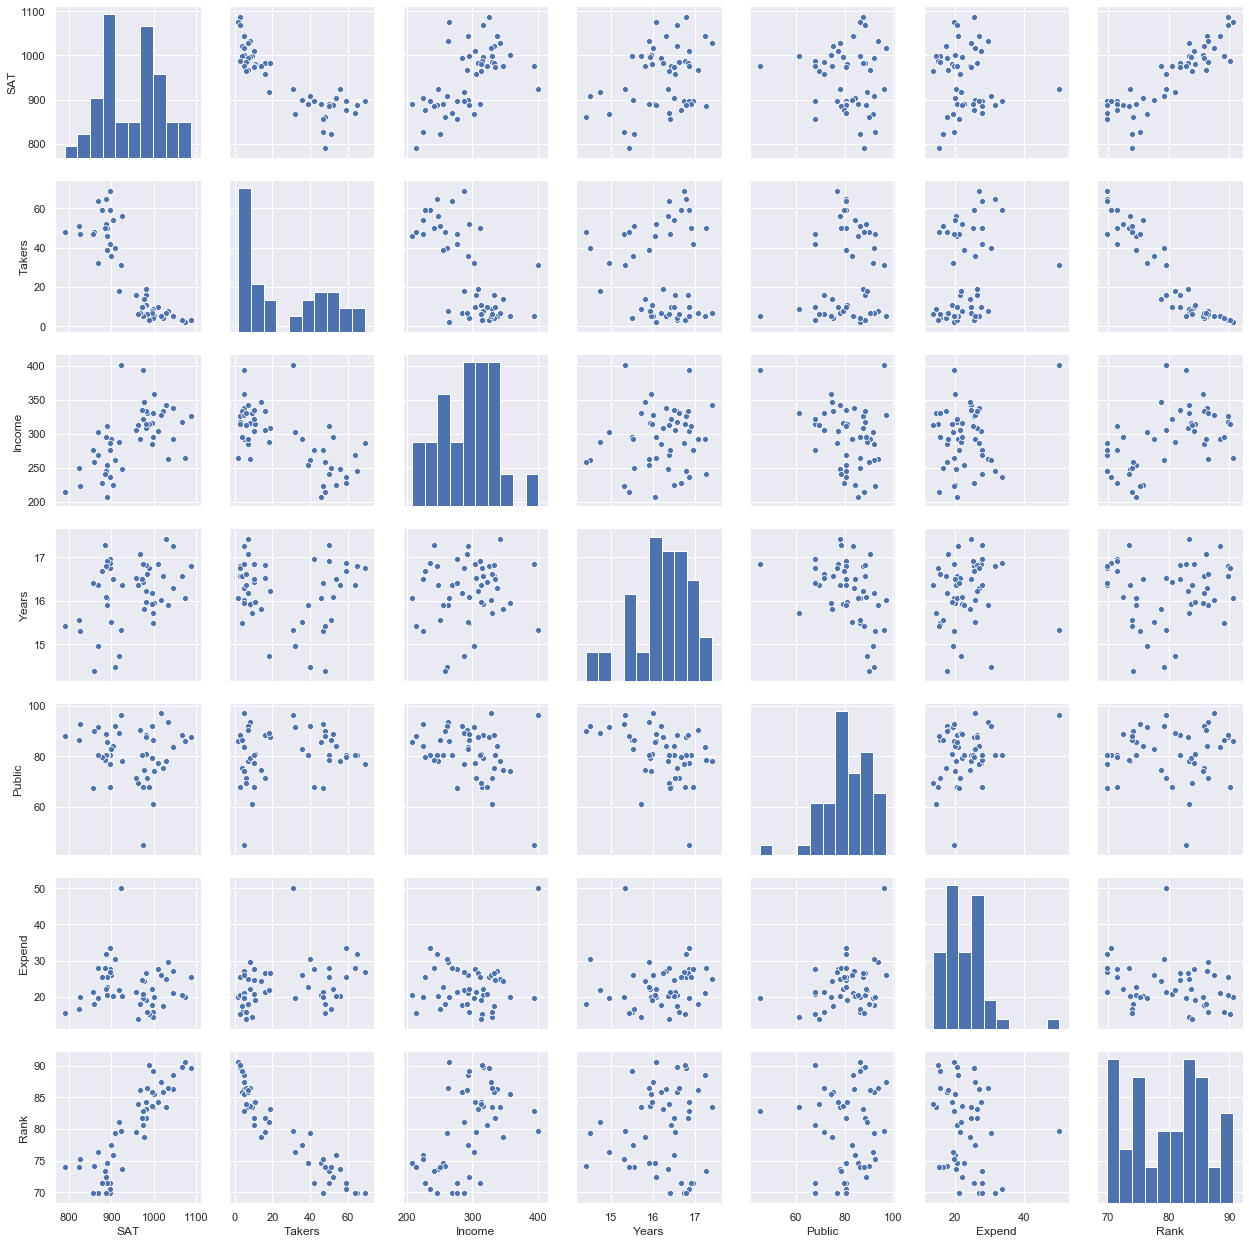

In [4]:
sns.pairplot(df)

*Expend* shows one big outlier, Alaska, lying 4.4 standard deviations away from the mean.

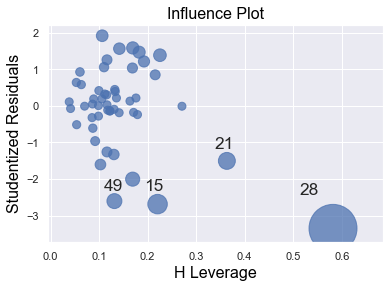

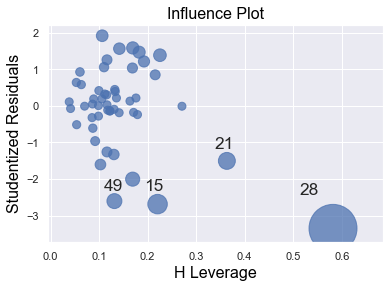

In [5]:
formula = 'SAT ~ Takers + Income + Years + Public + Expend + Rank' 
model = smf.ols(formula=formula, data=df) 
model_fit = model.fit()  
infl = model_fit.get_influence()
fig, ax = plt.subplots()
sm.graphics.influence_plot(model_fit, criterion='cooks', ax=ax)

In [6]:
df[df.index.isin([21, 28])]


,State,SAT,Takers,Income,Years,Public,Expend,Rank
21,Louisiana,975,5,394,16.850,44.800,19.720,82.900
28,Alaska,923,31,401,15.320,96.500,50.100,79.600


Alaska shows both a high Studentized Residual and high leverage.  Louisiana also shows high leverage, but not a high studentized residual.  Alaska's relatively high expenditure may be due to both the extreme climate and remoteness of smaller schools.

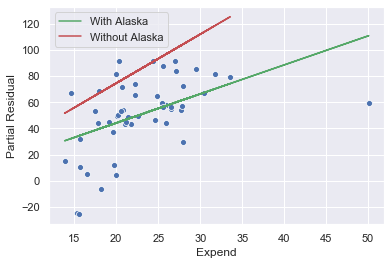

In [11]:
formula = 'SAT ~ Takers + Income + Years + Public + Expend + Rank'
model = smf.ols(formula=formula, data=df)
model_fit = model.fit()

part_resid = model_fit.resid + model_fit.params['Expend'] * df['Expend']
fig, ax = plt.subplots()
sns.scatterplot(df['Expend'], part_resid, ax=ax)
ax.set_ylabel('Partial Residual')

df1 = pd.DataFrame({'Expend': df['Expend'], 'Pres': part_resid})
pm1 = smf.ols('Pres ~ Expend', data=df1).fit()
plt.plot(df1['Expend'], pm1.fittedvalues, 'g', label='With Alaska')

df_wo_alaska = data=df[df.index != 28]
model_sans_alaska = smf.ols(formula=formula, data=df_wo_alaska)
model_sans_alaska_fit = model_sans_alaska.fit()

endog2 = model_sans_alaska_fit.resid + model_sans_alaska_fit.params['Expend'] * df_wo_alaska['Expend']
df2 = pd.DataFrame({'Expend': df_wo_alaska['Expend'], 'Pres': endog2})
pm2 = smf.ols('Pres ~ Expend', data=df2).fit()
plt.plot(df_wo_alaska['Expend'], pm2.fittedvalues, 'r', label='Without Alaska')

plt.legend(loc='best')

# Statistical Conclusion
The percentage of eligible students taking the test and the median class rank of the students taking the test explain 81.5% of the variation in state average test scores.  This confirms the expectation that much of the between-states variation in SAT scores can be explained by the relative quality of the students within the state who decide to take the test.  After the percentage of students in a state who take the test and the median class rank of these students are accounted for, convincing evidence exists that both state expenditures (one-sided $p$-value < 0.0001) and years of formal study in social sciences, natural sciences, and humanities (one-sided $p$-value = 0.0005) are associated with SAT averages.  Alaska had a substatially higher expenditure than other states and was excluded from the analysis.

The ranking of states after accounting for the relative quality of students in the state who take the exam (as represented by the percentage of takers and the median class rank of the students taking the exam) is shown [above](#Ranking-After-Accounting-For-Relative-Student-Quality).  Here, the states are ordered according to the size of their residuals in the regresion of SAT scores on percentage of takers and median class rank.  For example, the SAT average for New Hampshire is 49 points higher than the estimated mean SAT for states with the same percentage of students taking the exam and median class rank.  This ranking and the ranking based on raw averages show some dramatic differences.  South Dakota ranks second in its raw SAT scores, for example, but only 2% of its eligible students took the exam.  After percentage of takers and median class rank are accounted for, South Dakota ranks 24th.

The ranking of states after additionally accounting for state expenditure is [also shown](#Ranking-After-Accounting-For-State-Expenditure).  This ranking provides a means of gauging how states perform for the amount of money they spend.  For example, Oregon ranks 31st in its unadjusted average SAT.  But after accounting for the percentage of takers, their median class rankings, and the state's expenditure per student, it ranks 46th, indicating that its students performed below what might have been expected given the amount of money the state spends on education.
